In [95]:
# Import all necessary libraries.
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [65]:
# Definition of utility functions.
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [66]:
# Load the dataset.
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [67]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

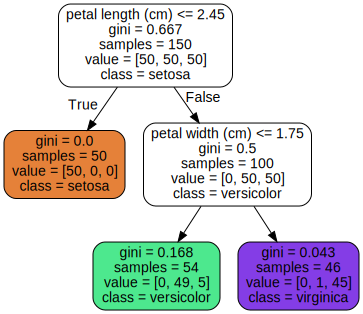

In [68]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

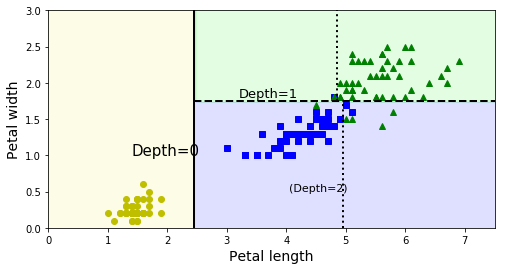

In [69]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Removing the widest IrisVersicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)

In [70]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [71]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

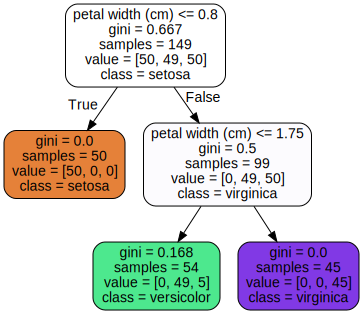

In [72]:
dot_data = export_graphviz(tree_clf_tweaked, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

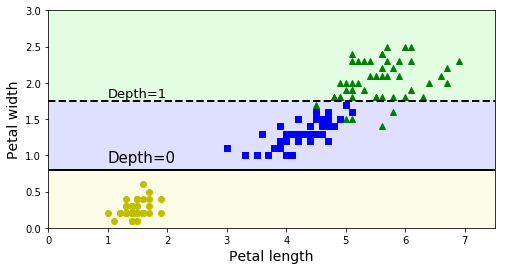

In [73]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

## Observações

Em geral, o principal problema das Árvores de Decisão é que elas são muito sensíveis a pequenas variações nos dados de treinamento. Na verdade, como o algoritmo de treinamento usado pela biblioteca Scikit-Learn é estocástico, é possível obter-se modelos muito diferentes com o mesmo conjunto de treinamento (a menos que você defina o hiperparâmetro random_state). As florestas aleatórias podem limitar essa instabilidade calculando a média das previsões feitas por diversas árvores de decisão.

# Varying the random_state hyperparameter 

In [105]:
# Re-loading the dataset.
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

target_names = iris.target_names

## random_state=40

In [106]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

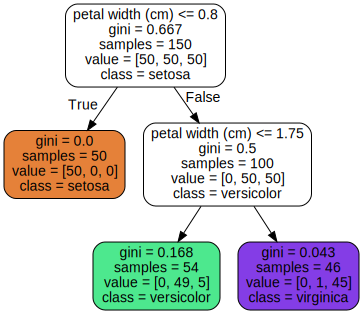

In [107]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

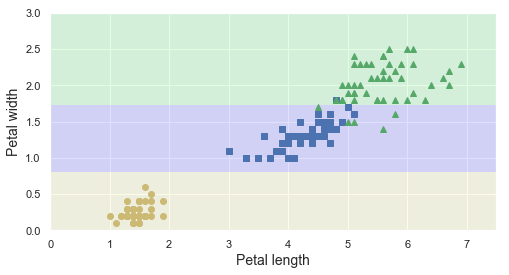

In [108]:
# Plot the decision boundaies.
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

In [109]:
# Use the trained classifier to predict labels for the test features.
y_pred = tree_clf.predict(X)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.96


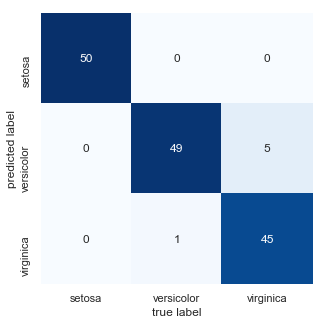

In [110]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()

## random_state=41

In [111]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=41)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=41,
            splitter='best')

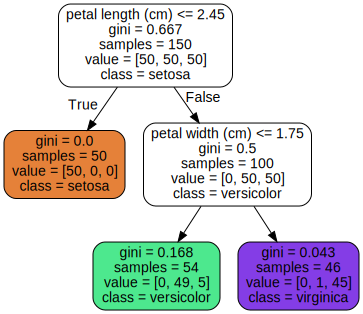

In [112]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

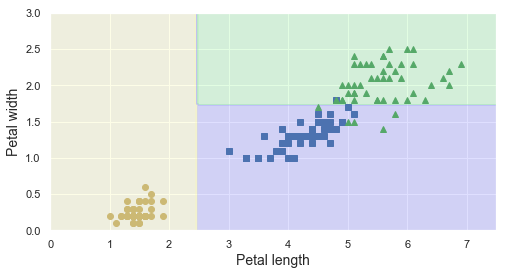

In [113]:
# Plot the decision boundaies.
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

In [114]:
# Use the trained classifier to predict labels for the test features.
y_pred = tree_clf.predict(X)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.96


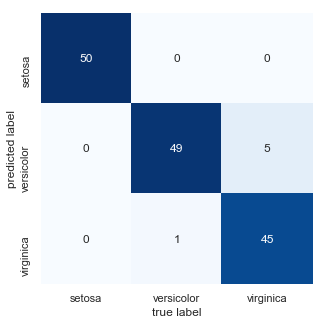

In [115]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()

## Observações

Percebam que até a variação do hiperparâmetro 'random_state' faz com que obtenhamos diferentes árvores de decisão, mostrando mais uma vez que elas são muito sensíveis a variações nos dados de treinamento.

# Unlimited Tree

In [116]:
# Instantiate and train the classifier.
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

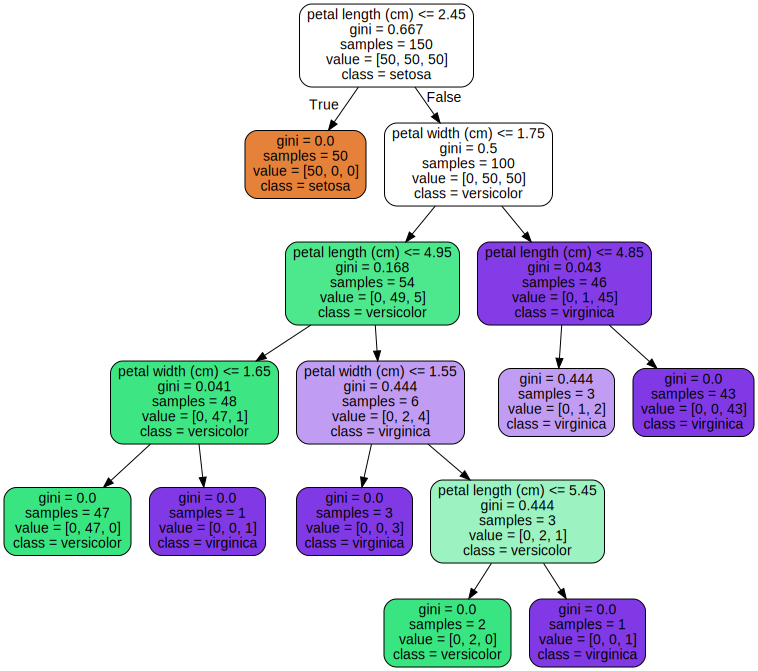

In [117]:
dot_data = export_graphviz(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graph = graphviz.Source(dot_data)
graph

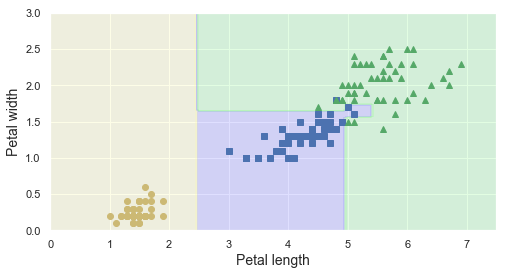

In [118]:
# Plot the decision boundaies.
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show()

In [119]:
# Use the trained classifier to predict labels for the test features.
y_pred = tree_clf.predict(X)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.9933333333333333


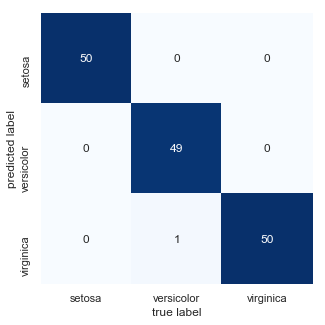

In [120]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()